## Setup

In [1]:
import pandas as pd

from src.loader import config

dataset_path = config["dataset"].get_path()
df_train = pd.read_csv(f"{dataset_path}train.csv")

features: list[str] = df_train.columns.to_list()
features

['Age',
 'BMI',
 'Glucose',
 'Insulin',
 'HOMA',
 'Leptin',
 'Adiponectin',
 'Resistin',
 'MCP.1',
 'Classification']

In [2]:
from src.tree.generate import generate_random_tree

population = [
    generate_random_tree(features, config["max_depth"], None)
    for _ in range(config["population_size"])
]

## Imports

In [3]:
from graphviz import Source

## Initial

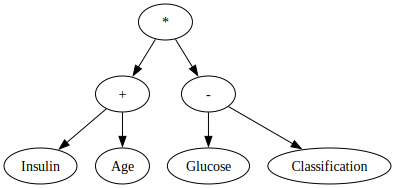

In [4]:
Source("digraph {" + population[0].to_dot() + "}")

## Swap Operator

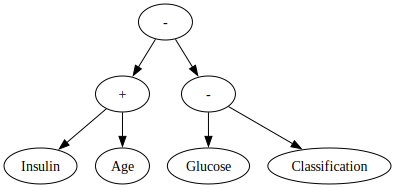

In [5]:
from src.mutate import swap_operator

swapped_tree = swap_operator(population[0])

Source("digraph {" + swapped_tree.to_dot() + "}")

## Operator to Terminal

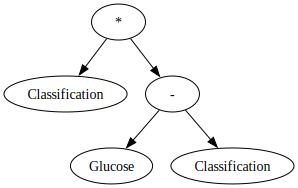

In [6]:
from copy import deepcopy

from src.mutate import mutate_operator_to_terminal

mutated_tree = deepcopy(population[0])

mutated_tree.left = mutate_operator_to_terminal(mutated_tree.left, features)

Source("digraph {" + mutated_tree.to_dot() + "}")

## Grow Subtree

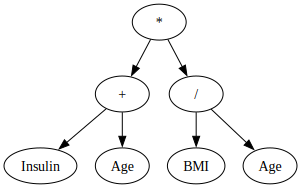

In [7]:
mutated_tree = deepcopy(population[0])

mutated_tree.right = generate_random_tree(features, max_depth=2, parent=mutated_tree)

Source("digraph {" + mutated_tree.to_dot() + "}")

## Swap Terminal

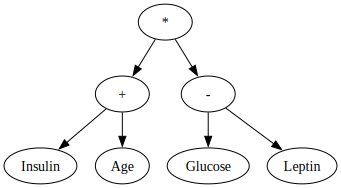

In [10]:
from src.mutate import swap_terminal

mutated_tree = deepcopy(population[0])

mutated_tree.right.right = swap_terminal(mutated_tree.right.right, features)

Source("digraph {" + mutated_tree.to_dot() + "}")

## Complete Tree Mutation

In [9]:
population = [generate_random_tree(features, 4, None) for _ in range(10)]

### Original

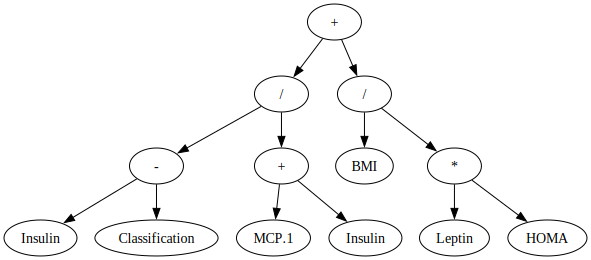

In [10]:
Source("digraph {" + population[0].to_dot() + "}")

### Mutated

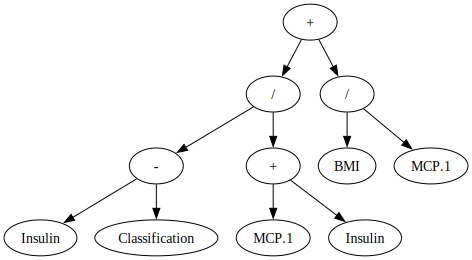

In [20]:
from src.mutate import mutate

tree_copy = deepcopy(population[0])

mutate(tree_copy, features)

Source("digraph {" + tree_copy.to_dot() + "}")